In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("phl_exoplanet_catalog_2019.csv")

In [ ]:
data

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0       11 Com b       3.0  6165.86330        -476.74200         476.74200   
1       11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2       14 And b       3.0  1525.57440               NaN               NaN   
3       14 Her b       3.0  1481.07850         -47.67420          47.67420   
4     16 Cyg B b       3.0   565.73385         -25.42624          25.42624   
...          ...       ...         ...               ...               ...   
4043    K2-296 b       3.0         NaN               NaN               NaN   
4044    K2-296 c       3.0         NaN               NaN               NaN   
4045   GJ 1061 b       3.0     1.38000           0.15000           0.16000   
4046   GJ 1061 c       3.0     1.75000           0.23000           0.23000   
4047   GJ 1061 d       3.0     1.68000           0.24000           0.25000   

      P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  \
0          NaN                 NaN                 NaN    2007  2014-05-14   
1          NaN                 NaN                 NaN    2009  2018-09-06   
2          NaN                 NaN                 NaN    2008  2014-05-14   
3          NaN                 NaN                 NaN    2002  2018-09-06   
4          NaN                 NaN                 NaN    1996  2018-09-06   
...        ...                 ...                 ...     ...         ...   
4043      1.87                0.45                 0.2    2019     5/23/19   
4044      2.76                 NaN                 NaN    2019     5/23/19   
4045       NaN                 NaN                 NaN    2019      9/3/19   
4046       NaN                 NaN                 NaN    2019      9/3/19   
4047       NaN                 NaN                 NaN    2019      9/3/19   

      ...  P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0     ...              0          Hot            0  0.083813   Coma Berenices   
1     ...              0          Hot            0  0.082414       Ursa Minor   
2     ...              0          Hot            0  0.081917        Andromeda   
3     ...              0         Cold            0  0.145241         Hercules   
4     ...              1         Warm            0  0.368627           Cygnus   
...   ...            ...          ...          ...       ...              ...   
4043  ...              0         Warm            2  0.755038            Virgo   
4044  ...              0          Hot            0  0.363831            Virgo   
4045  ...              0          Hot            0  0.588562       Horologium   
4046  ...              0         Warm            1  0.879042       Horologium   
4047  ...              1         Warm            1  0.798200       Horologium   

      S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST   P_MASS_EST  \
0                     Com      Berenice's Hair     12.082709  6165.863300   
1                     UMi          Little Bear     12.229641  4684.784800   
2                     And            Andromeda     12.848516  1525.574400   
3                     Her             Hercules     12.865261  1481.078500   
4                     Cyg                 Swan     13.421749   565.733850   
...                   ...                  ...           ...          ...   
4043                  Vir               Virgin      1.870000     4.155456   
4044                  Vir               Virgin      2.760000     8.047485   
4045                  Hor       Pendulum Clock      1.102775     1.380000   
4046                  Hor       Pendulum Clock      1.178333     1.750000   
4047                  Hor       Pendulum Clock      1.164989     1.680000   

      P_SEMI_MAJOR_AXIS_EST  
0                   1.29000  
1                   1.53000  
2                   0.83000  
3                   2.93000  
4                   1.66000  
...                     ...  
4043                0.13456 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [ ]:
miss = data.columns ^ data.describe().columns

<ipython-input-5-c61ec5dba906>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  miss = data.columns ^ data.describe().columns


In [ ]:
miss = data.columns ^ data.describe().columns
miss
miss = miss.drop(["P_TYPE","P_TYPE_TEMP"])

<ipython-input-6-ccd209292584>:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  miss = data.columns ^ data.describe().columns


In [ ]:
one_one = data.describe()[1:8]

In [ ]:
met_fill = data["S_METALLICITY"].describe()[5]

In [ ]:

data["S_METALLICITY"].fillna(met_fill,inplace=True)

Metallicity = log(Fe/H)(star) - log(Fe/H)(sun)

The Metallicity is the ratio of the available heavy metals (here, Fe) with respect to the available H and He in the star.

In [ ]:
log_sun = -4.3

In [ ]:
data["Fe to H Ratio"] = np.power(10,data["S_METALLICITY"]-4.3)

In [ ]:
data

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0       11 Com b       3.0  6165.86330        -476.74200         476.74200   
1       11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2       14 And b       3.0  1525.57440               NaN               NaN   
3       14 Her b       3.0  1481.07850         -47.67420          47.67420   
4     16 Cyg B b       3.0   565.73385         -25.42624          25.42624   
...          ...       ...         ...               ...               ...   
4043    K2-296 b       3.0         NaN               NaN               NaN   
4044    K2-296 c       3.0         NaN               NaN               NaN   
4045   GJ 1061 b       3.0     1.38000           0.15000           0.16000   
4046   GJ 1061 c       3.0     1.75000           0.23000           0.23000   
4047   GJ 1061 d       3.0     1.68000           0.24000           0.25000   

      P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  \
0          NaN                 NaN                 NaN    2007  2014-05-14   
1          NaN                 NaN                 NaN    2009  2018-09-06   
2          NaN                 NaN                 NaN    2008  2014-05-14   
3          NaN                 NaN                 NaN    2002  2018-09-06   
4          NaN                 NaN                 NaN    1996  2018-09-06   
...        ...                 ...                 ...     ...         ...   
4043      1.87                0.45                 0.2    2019     5/23/19   
4044      2.76                 NaN                 NaN    2019     5/23/19   
4045       NaN                 NaN                 NaN    2019      9/3/19   
4046       NaN                 NaN                 NaN    2019      9/3/19   
4047       NaN                 NaN                 NaN    2019      9/3/19   

      ...  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0     ...          Hot            0  0.083813   Coma Berenices   
1     ...          Hot            0  0.082414       Ursa Minor   
2     ...          Hot            0  0.081917        Andromeda   
3     ...         Cold            0  0.145241         Hercules   
4     ...         Warm            0  0.368627           Cygnus   
...   ...          ...          ...       ...              ...   
4043  ...         Warm            2  0.755038            Virgo   
4044  ...          Hot            0  0.363831            Virgo   
4045  ...          Hot            0  0.588562       Horologium   
4046  ...         Warm            1  0.879042       Horologium   
4047  ...         Warm            1  0.798200       Horologium   

      S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST   P_MASS_EST  \
0                     Com      Berenice's Hair     12.082709  6165.863300   
1                     UMi          Little Bear     12.229641  4684.784800   
2                     And            Andromeda     12.848516  1525.574400   
3                     Her             Hercules     12.865261  1481.078500   
4                     Cyg                 Swan     13.421749   565.733850   
...                   ...                  ...           ...          ...   
4043                  Vir               Virgin      1.870000     4.155456   
4044                  Vir               Virgin      2.760000     8.047485   
4045                  Hor       Pendulum Clock      1.102775     1.380000   
4046                  Hor       Pendulum Clock      1.178333     1.750000   
4047                  Hor       Pendulum Clock      1.164989     1.680000   

      P_SEMI_MAJOR_AXIS_EST  Fe to H Ratio  
0                   1.29000       0.000022  
1                   1.53000       0.000048  
2                   0.83000       0.000029  
3                   2.93000       0.000129  
4                   1.66000       0.000058  
...                     ...            ...  
4043                0.13456       0.000050  
4044                0.05769       0.000050  
4045         

In [ ]:
data["S_AGE"].fillna(data["S_AGE"].describe()[5],inplace=True)

In [ ]:
data.drop([4043,4044],axis=0,inplace=True)

Star age and metallicity have little to no correlation. Over a large Gyr span, the age of a star has negigible bearing on its metalliicity.

<Axes: >

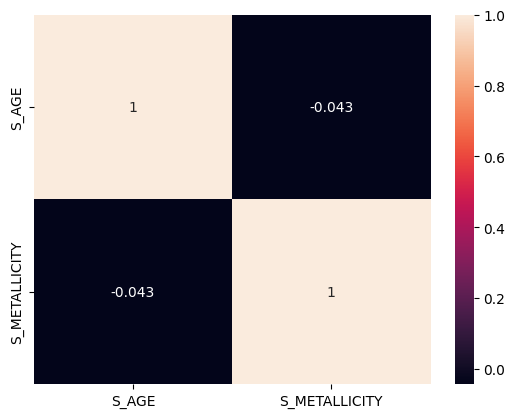

In [ ]:
sns.heatmap(data[["S_AGE","S_METALLICITY"]].corr(),annot=True)

There is no conceivable pattern as in apparent from the scatterplot below

In [ ]:
sns.scatterplot(x=data["S_AGE"],y=data["S_METALLICITY"])

<Axes: xlabel='S_AGE', ylabel='S_METALLICITY'>

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({"font.size":4})

In [ ]:
zahlen = data.drop(miss,axis=1)

In [ ]:
zahlen

P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  P_RADIUS  \
0          3.0  6165.86330       -476.742000        476.742000       NaN   
1          3.0  4684.78480       -794.570010        794.570010       NaN   
2          3.0  1525.57440               NaN               NaN       NaN   
3          3.0  1481.07850        -47.674200         47.674200       NaN   
4          3.0   565.73385        -25.426240         25.426240       NaN   
...        ...         ...               ...               ...       ...   
4041       3.0   629.61727         -6.038732          6.038732       NaN   
4042       3.0  1313.26530         -9.217012          9.217012       NaN   
4045       3.0     1.38000          0.150000          0.160000       NaN   
4046       3.0     1.75000          0.230000          0.230000       NaN   
4047       3.0     1.68000          0.240000          0.250000       NaN   

      P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR    P_PERIOD  \
0                    NaN                 NaN    2007   326.03000   
1                    NaN                 NaN    2009   516.21997   
2                    NaN                 NaN    2008   185.84000   
3                    NaN                 NaN    2002  1773.40000   
4                    NaN                 NaN    1996   798.50000   
...                  ...                 ...     ...         ...   
4041                 NaN                 NaN    1999   241.25800   
4042                 NaN                 NaN    1999  1276.46000   
4045                 NaN                 NaN    2019     3.20400   
4046                 NaN                 NaN    2019     6.68900   
4047                 NaN                 NaN    2019    13.03100   

      P_PERIOD_ERROR_MIN  ...  S_TIDAL_LOCK  P_HABZONE_OPT  P_HABZONE_CON  \
0                 -0.320  ...      0.642400              0              0   
1                 -3.200  ...      0.648683              0              0   
2                 -0.230  ...      0.600010              0              0   
3                 -2.500  ...      0.445415              0              0   
4                 -1.000  ...      0.473325              1              1   
...                  ...  ...           ...            ...            ...   
4041              -0.064  ...      0.510545              0              0   
4042              -0.570  ...      0.510545              0              0   
4045               0.001  ...      0.244044              0              0   
4046               0.005  ...      0.244044              1              0   
4047               0.032  ...      0.244044              1              1   

      P_TYPE_TEMP  P_HABITABLE     P_ESI  P_RADIUS_EST  P_MASS_EST  \
0             Hot            0  0.083813     12.082709  6165.86330   
1             Hot            0  0.082414     12.229641  4684.78480   
2             Hot            0  0.081917     12.848516  1525.57440   
3            Cold            0  0.145241     12.865261  1481.07850   
4            Warm            0  0.368627     13.421749   565.73385   
...           ...          ...       ...           ...         ...   
4041          NaN            0       NaN     13.358715   629.61727   
4042          NaN            0       NaN     12.933515  1313.26530   
4045          Hot            0  0.588562      1.102775     1.38000   
4046         Warm            1  0.879042      1.178333     1.75000   
4047         Warm            1  0.798200      1.164989     1.68000   

      P_SEMI_MAJOR_AXIS_EST  Fe to H Ratio  
0                  1.290000       0.000022  
1                  1.530000       0.000048  
2                  0.830000       0.000029  
3                  2.930000       0.000129  
4                  1.660000       0.000058  
...                     ...            ...  
4041               0.827774       0.000052  
4042               2.513290       0.000052  
4045               0.021000       0.000042  
4046               0.035000       0.000042  
4047           

In [ ]:
drop_col = ["P_STATUS","P_MASS","P_MASS_ERROR_MIN","P_MASS_ERROR_MAX","P_RADIUS","P_RADIUS_ERROR_MIN",
            "P_RADIUS_ERROR_MAX","P_YEAR","P_PERIOD_ERROR_MIN","P_PERIOD_ERROR_MAX","P_SEMI_MAJOR_AXIS",
            "P_SEMI_MAJOR_AXIS_ERROR_MIN","P_SEMI_MAJOR_AXIS_ERROR_MAX","P_ECCENTRICITY_ERROR_MIN",
            "P_ECCENTRICITY_ERROR_MAX","P_INCLINATION_ERROR_MIN","P_INCLINATION_ERROR_MAX",
            "P_OMEGA_ERROR_MIN","P_OMEGA_ERROR_MAX","P_TPERI_ERROR_MIN","P_TPERI_ERROR_MAX",
            "P_IMPACT_PARAMETER_ERROR_MIN","P_IMPACT_PARAMETER_ERROR_MAX","P_GEO_ALBEDO",
            "P_GEO_ALBEDO_ERROR_MIN","P_GEO_ALBEDO_ERROR_MAX","P_DETECTION_MASS","P_DETECTION_RADIUS",
            "P_ATMOSPHERE","S_DISC","S_MAGNETIC_FIELD","P_ALT_NAMES","S_DISTANCE_ERROR_MIN","S_DISTANCE_ERROR_MAX",
            "S_METALLICITY_ERROR_MIN","S_METALLICITY_ERROR_MAX","S_MASS_ERROR_MIN","S_MASS_ERROR_MAX",
            "S_RADIUS_ERROR_MIN","S_RADIUS_ERROR_MAX","S_AGE_ERROR_MIN","S_AGE_ERROR_MAX","S_TEMPERATURE_ERROR_MIN",
            "S_TEMPERATURE_ERROR_MAX","P_FLUX_MIN","P_FLUX_MAX","P_TEMP_EQUIL_MIN","P_TEMP_EQUIL_MIN","S_RADIUS",
            "S_HZ_CON0_MIN","S_HZ_CON0_MAX","S_HZ_CON1_MIN","S_HZ_CON1_MAX"]
data_clean = zahlen.drop(drop_col,axis=1)

In [ ]:
data_clean

P_PERIOD  P_ECCENTRICITY  P_INCLINATION  P_OMEGA    P_TPERI  \
0      326.03000          0.2310            NaN    94.80  2452899.6   
1      516.21997          0.0800            NaN      NaN        NaN   
2      185.84000          0.0000            NaN     0.00  2452861.4   
3     1773.40000          0.3700            NaN      NaN        NaN   
4      798.50000          0.6800            NaN      NaN        NaN   
...          ...             ...            ...      ...        ...   
4041   241.25800          0.2596            NaN   241.70  2450157.8   
4042  1276.46000          0.2987            NaN   258.82  2451347.5   
4045     3.20400          0.0000            NaN   145.00        0.0   
4046     6.68900          0.0000            NaN    88.00        0.0   
4047    13.03100          0.0000            NaN   157.00        0.0   

      P_ANGULAR_DISTANCE  P_IMPACT_PARAMETER  P_TEMP_MEASURED        S_RA  \
0                   13.8                 NaN              NaN  185.179280   
1                   12.2                 NaN              NaN  229.274540   
2                   11.0                 NaN              NaN  352.822570   
3                  163.0                 NaN              NaN  242.601300   
4                   78.5                 NaN              NaN  295.466550   
...                  ...                 ...              ...         ...   
4041                61.7                 NaN              NaN   24.199345   
4042               187.0                 NaN              NaN   24.199345   
4045                 0.0                 0.0              0.0   53.998749   
4046                 0.0                 0.0              0.0   53.998749   
4047                 0.0                 0.0              0.0   53.998749   

          S_DEC  ...  S_TIDAL_LOCK  P_HABZONE_OPT  P_HABZONE_CON  P_TYPE_TEMP  \
0     17.792868  ...      0.642400              0              0          Hot   
1     71.823898  ...      0.648683              0              0          Hot   
2     39.236198  ...      0.600010              0              0          Hot   
3     43.817646  ...      0.445415              0              0         Cold   
4     50.517525  ...      0.473325              1              1         Warm   
...         ...  ...           ...            ...            ...          ...   
4041  41.405460  ...      0.510545              0              0          NaN   
4042  41.405460  ...      0.510545              0              0          NaN   
4045 -44.512703  ...      0.244044              0              0          Hot   
4046 -44.512703  ...      0.244044              1              0         Warm   
4047 -44.512703  ...      0.244044              1              1         Warm   

      P_HABITABLE     P_ESI  P_RADIUS_EST  P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  \
0               0  0.083813     12.082709  6165.86330               1.290000   
1               0  0.082414     12.229641  4684.78480               1.530000   
2               0  0.081917     12.848516  1525.57440               0.830000   
3               0  0.145241     12.865261  1481.07850               2.930000   
4               0  0.368627     13.421749   565.73385               1.660000   
...           ...       ...           ...         ...                    ...   
4041            0       NaN     13.358715   629.61727               0.827774   
4042            0       NaN     12.933515  1313.26530               2.513290   
4045            0  0.588562      1.102775     1.38000               0.021000   
4046            1  0.879042      1.178333     1.75000               0.035000   
4047            1  0.798200      1.164989     1.68000               0.054000   

      Fe to H Ratio  
0          0.000022  
1          0.000048  
2          0.000029  
3          0.000129  
4          0.000058  
...             ...  
4041       0.000052  
4042       0.000052  
4045       0.000042  
4046       0.000042  
4047       0.000042  

[4046 rows x 49 columns]

In [ ]:
sns.heatmap(data_clean.corr())

<ipython-input-25-d43f0587ee27>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_clean.corr())


<Axes: >

In [ ]:
data_clean.columns

Index(['P_PERIOD', 'P_ECCENTRICITY', 'P_INCLINATION', 'P_OMEGA', 'P_TPERI',
       'P_ANGULAR_DISTANCE', 'P_IMPACT_PARAMETER', 'P_TEMP_MEASURED', 'S_RA',
       'S_DEC', 'S_MAG', 'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_AGE',
       'S_TEMPERATURE', 'S_LOG_G', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY',
       'P_DENSITY', 'P_HILL_SPHERE', 'P_DISTANCE', 'P_PERIASTRON',
       'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX', 'P_TEMP_EQUIL',
       'P_TEMP_EQUIL_MAX', 'P_TYPE', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY',
       'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',
       'S_SNOW_LINE', 'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT',
       'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'P_RADIUS_EST',
       'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST', 'Fe to H Ratio'],
      dtype='object')

In [ ]:
data_clean["P_ECCENTRICITY"] = (data_clean["P_APASTRON"]-data_clean["P_PERIASTRON"])/((data_clean["P_APASTRON"]+data_clean["P_PERIASTRON"]))

In [ ]:
ptype_enc = {"Miniterran":0,"Subterran":1,"Terran":2,"Superterran":3,"Neptunian":4,"Jovian":5,np.nan:np.nan}

In [ ]:
temptype_enc = {"Cold":0,"Warm":1,"Hot":2,np.nan:np.nan}

In [ ]:
data_clean["P_TYPE_TEMP"] = data_clean["P_TYPE_TEMP"].replace(temptype_enc.keys(),temptype_enc.values())
data_clean["P_TYPE"] = data_clean["P_TYPE"].replace(ptype_enc.keys(),ptype_enc.values())

In [ ]:
data_clean["P_TYPE_TEMP"]

0       2.0
1       2.0
2       2.0
3       0.0
4       1.0
       ... 
4041    NaN
4042    NaN
4045    2.0
4046    1.0
4047    1.0
Name: P_TYPE_TEMP, Length: 4046, dtype: float64

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4046 entries, 0 to 4047
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_PERIOD               3936 non-null   float64
 1   P_ECCENTRICITY         3976 non-null   float64
 2   P_INCLINATION          842 non-null    float64
 3   P_OMEGA                744 non-null    float64
 4   P_TPERI                479 non-null    float64
 5   P_ANGULAR_DISTANCE     2359 non-null   float64
 6   P_IMPACT_PARAMETER     1407 non-null   float64
 7   P_TEMP_MEASURED        3 non-null      float64
 8   S_RA                   4046 non-null   float64
 9   S_DEC                  4046 non-null   float64
 10  S_MAG                  3867 non-null   float64
 11  S_DISTANCE             4040 non-null   float64
 12  S_METALLICITY          4046 non-null   float64
 13  S_MASS                 3281 non-null   float64
 14  S_AGE                  4046 non-null   float64
 15  S_TE

In [ ]:
percent_missing[data_clean.columns].sort_values()

Fe to H Ratio             0.000000
S_AGE                     0.000000
S_METALLICITY             0.000000
S_DEC                     0.000000
S_RA_H                    0.000000
S_RA                      0.000000
P_HABZONE_CON             0.000000
P_HABITABLE               0.000000
P_RADIUS_EST              0.000000
P_MASS_EST                0.000000
P_HABZONE_OPT             0.000000
S_DISTANCE                0.148295
P_TYPE                    0.420168
P_PERIASTRON              1.730104
P_DISTANCE_EFF            1.730104
P_SEMI_MAJOR_AXIS_EST     1.730104
P_DISTANCE                1.730104
P_APASTRON                1.730104
P_PERIOD                  2.718735
S_MAG                     4.424123
S_RADIUS_EST              5.042017
S_TEMPERATURE             5.116164
S_SNOW_LINE               6.475531
S_HZ_CON_MAX              6.475531
S_HZ_CON_MIN              6.475531
S_HZ_OPT_MAX              6.475531
S_LUMINOSITY              6.475531
S_HZ_OPT_MIN              6.475531
P_TEMP_EQUIL_MAX    

In [ ]:
drop2 =  percent_missing[data_clean.columns].sort_values()[37:49].keys()
drop2

Index(['P_ANGULAR_DISTANCE', 'P_HILL_SPHERE', 'P_IMPACT_PARAMETER',
       'P_ECCENTRICITY', 'P_INCLINATION', 'P_OMEGA', 'P_GRAVITY', 'P_ESCAPE',
       'P_DENSITY', 'P_POTENTIAL', 'P_TPERI', 'P_TEMP_MEASURED'],
      dtype='object')

In [ ]:
data_clean.drop(drop2,axis=1,inplace=True)

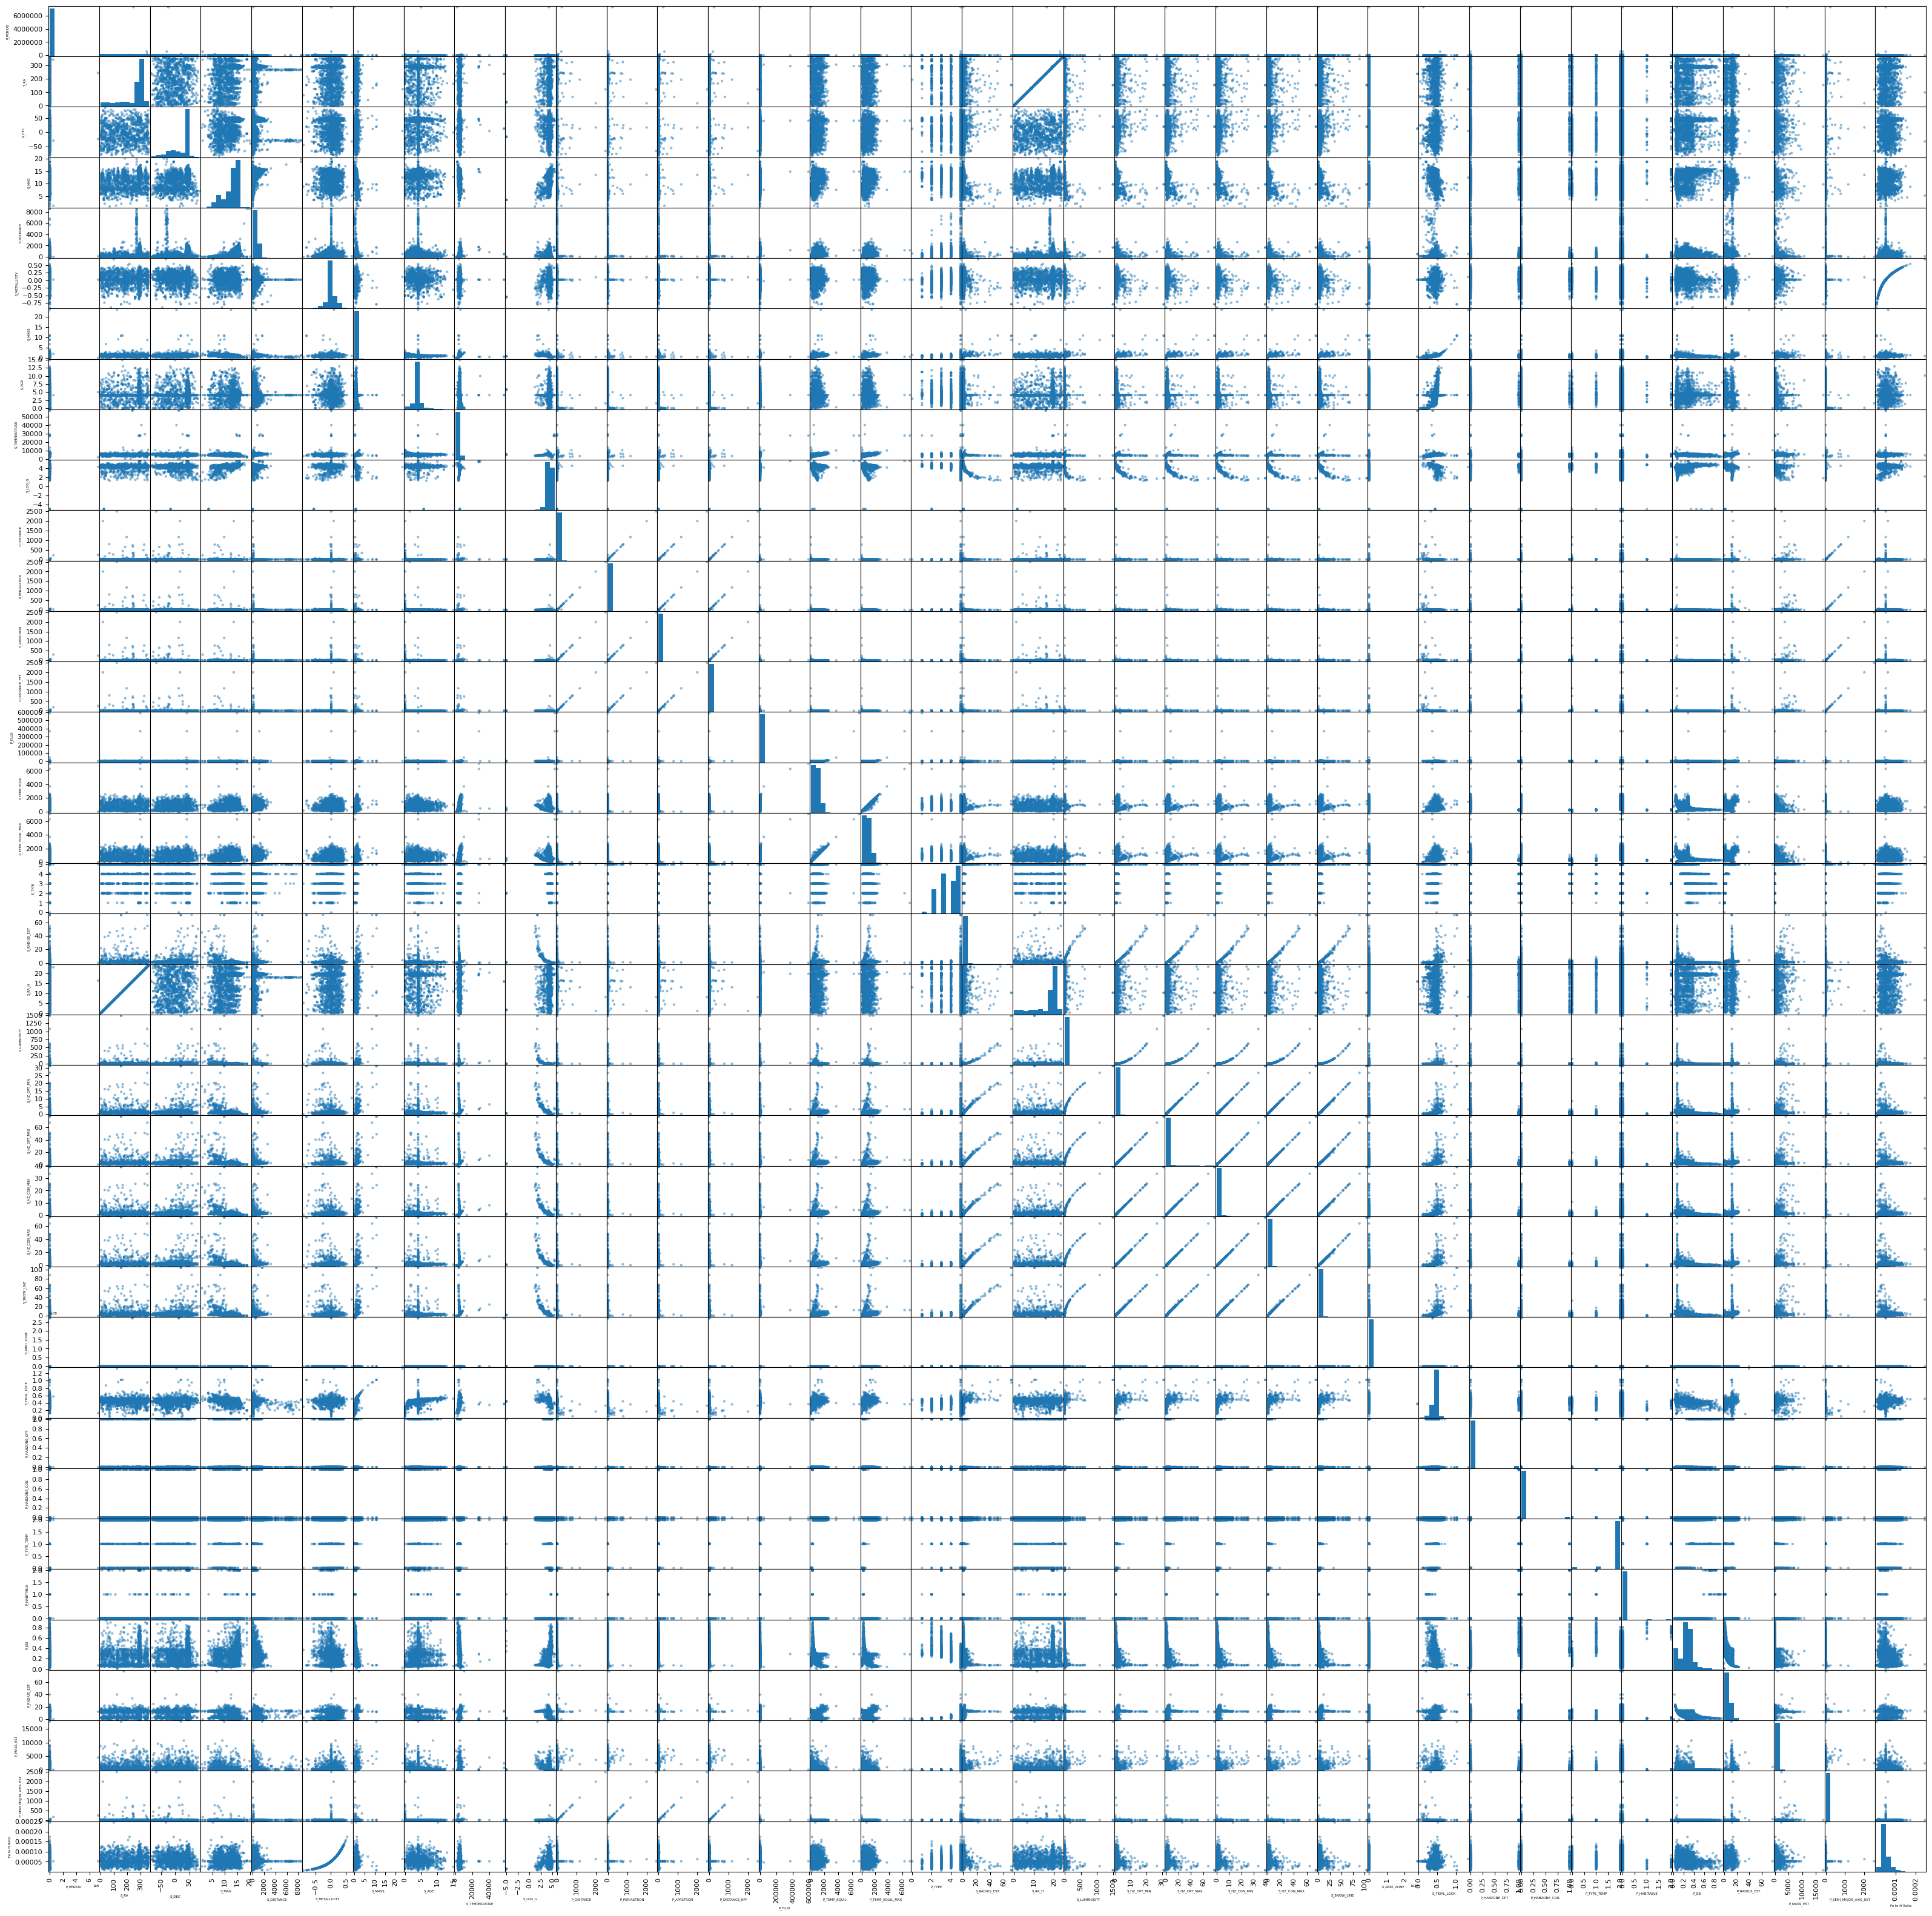

In [ ]:
pd.plotting.scatter_matrix(data_clean, alpha=0.5, figsize=(40, 40), diagonal='hist')
plt.show()

In [ ]:
data_clean

P_PERIOD        S_RA      S_DEC   S_MAG  S_DISTANCE  S_METALLICITY  \
0      326.03000  185.179280  17.792868   4.740       93.37          -0.35   
1      516.21997  229.274540  71.823898   5.016      125.72          -0.02   
2      185.84000  352.822570  39.236198   5.227       75.59          -0.24   
3     1773.40000  242.601300  43.817646   6.610       17.94           0.41   
4      798.50000  295.466550  50.517525   6.250       21.15           0.06   
...          ...         ...        ...     ...         ...            ...   
4041   241.25800   24.199345  41.405460   4.100       13.41           0.02   
4042  1276.46000   24.199345  41.405460   4.100       13.41           0.02   
4045     3.20400   53.998749 -44.512703  13.060        3.69          -0.08   
4046     6.68900   53.998749 -44.512703  13.060        3.69          -0.08   
4047    13.03100   53.998749 -44.512703  13.060        3.69          -0.08   

      S_MASS  S_AGE  S_TEMPERATURE  S_LOG_G  ...  S_TIDAL_LOCK  P_HABZONE_OPT  \
0       2.70   4.07         4742.0     2.31  ...      0.642400              0   
1       2.78   4.07         4213.0     1.93  ...      0.648683              0   
2       2.20   4.07         4813.0     2.63  ...      0.600010              0   
3       0.90   4.07         5338.0     4.45  ...      0.445415              0   
4       1.08   4.07         5750.0     4.36  ...      0.473325              1   
...      ...    ...            ...      ...  ...           ...            ...   
4041    1.30   5.00            NaN      NaN  ...      0.510545              0   
4042    1.30   5.00            NaN      NaN  ...      0.510545              0   
4045    0.12   7.00         2953.0      NaN  ...      0.244044              0   
4046    0.12   7.00         2953.0      NaN  ...      0.244044              1   
4047    0.12   7.00         2953.0      NaN  ...      0.244044              1   

      P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  P_RADIUS_EST  \
0                 0          2.0            0  0.083813     12.082709   
1                 0          2.0            0  0.082414     12.229641   
2                 0          2.0            0  0.081917     12.848516   
3                 0          0.0            0  0.145241     12.865261   
4                 1          1.0            0  0.368627     13.421749   
...             ...          ...          ...       ...           ...   
4041              0          NaN            0       NaN     13.358715   
4042              0          NaN            0       NaN     12.933515   
4045              0          2.0            0  0.588562      1.102775   
4046              0          1.0            1  0.879042      1.178333   
4047              1          1.0            1  0.798200      1.164989   

      P_MASS_EST  P_SEMI_MAJOR_AXIS_EST  Fe to H Ratio  
0     6165.86330               1.290000       0.000022  
1     4684.78480               1.530000       0.000048  
2     1525.57440               0.830000       0.000029  
3     1481.07850               2.930000       0.000129  
4      565.73385               1.660000       0.000058  
...          ...                    ...            ...  
4041   629.61727               0.827774       0.000052  
4042  1313.26530               2.513290       0.000052  
4045     1.38000               0.021000       0.000042  
4046     1.75000               0.035000       0.000042  
4047     1.68000               0.054000       0.000042  

[4046 rows x 37 columns]

In [ ]:
data_clean["P_TYPE"].mode()[0]

5.0

In [ ]:
data_clean["P_TYPE"].fillna((data_clean["P_TYPE"].mode())[0],inplace=True)
data_clean["P_TYPE_TEMP"].fillna((data_clean["P_TYPE_TEMP"].mode())[0],inplace=True)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X = data_clean.drop(["P_HABITABLE",],axis=1)
Y = data_clean["P_HABITABLE"]

imputer = IterativeImputer()
imputer.fit(X)
new = imputer.transform(X)
X.replace(X.values,new,inplace=True)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

In [ ]:
param = {
    "num_leaves":[27,30,33,36],
    "n_estimators":[100,300,500]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
lgbm = LGBMClassifier(objective="multiclass",boosting_type="gbdt",num_class=3)
clf = RandomizedSearchCV(lgbm, param, random_state=69)
search = clf.fit(X,Y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss, precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#best performing model
loss2 = []
accuracy2 = []

model = make_pipeline(MinMaxScaler(),search)
for i in range(2,11):
    Xtr, Xte, Ytr, Yte = train_test_split(X,Y,test_size=1/i)
    model.fit(Xtr,Ytr)
    loss2.append(log_loss(Yte,model.predict_proba(Xte)))
    accuracy2.append(precision_score(Yte,model.predict(Xte),average="macro"))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
K_values = range(2, 11)
plt.figure(figsize=(10, 5))
plt.plot(K_values, loss2, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Log Loss')
plt.title('Loss vs. K')

Text(0.5, 1.0, 'Loss vs. K')

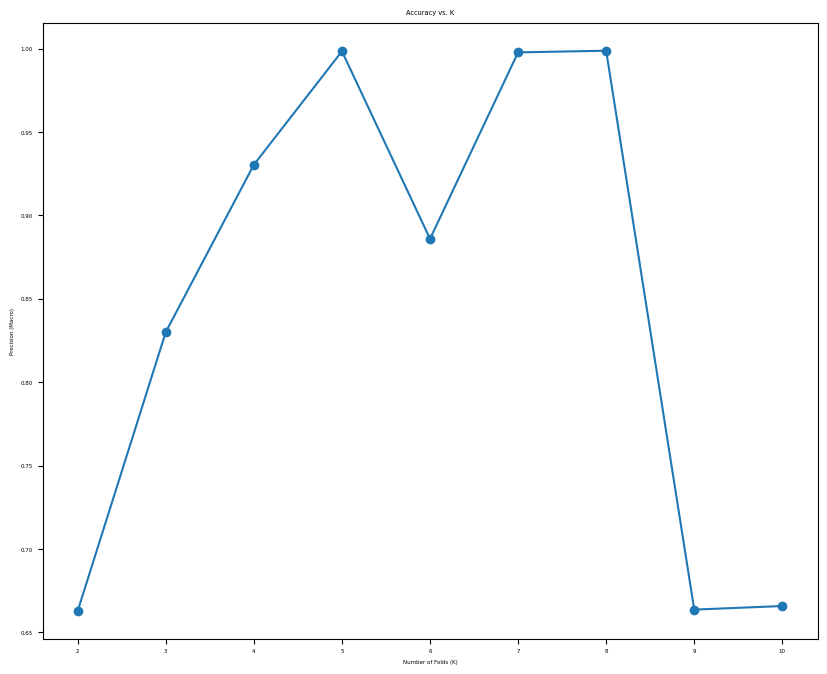

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(K_values, accuracy2, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Precision (Macro)')
plt.title('Accuracy vs. K')

plt.show()

In [ ]:
accuracy2

[0.6630272952853598,
 0.8301067262347978,
 0.9303512259774687,
 0.9983416252072969,
 0.8859038142620231,
 0.9976811594202899,
 0.9986693280106453,
 0.6636904761904762,
 0.6658415841584159]

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.01, verbose=0)

loss = []
accuracy = []

for i in range(2,11):
    kf = KFold(n_splits=i)
    for train_index, test_index in kf.split(X):
        Xtr, Xte = X.iloc[train_index], X.iloc[test_index]
        Ytr, Yte = Y.iloc[train_index], Y.iloc[test_index]
    model = make_pipeline(MinMaxScaler(),model).fit(Xtr,Ytr)
    loss.append(log_loss(Yte,model.predict_proba(Xte)))
    accuracy.append(precision_score(Yte,model.predict(Xte),average="macro"))


In [ ]:
accuracy

[0.327401548854836,
 0.3283877349159248,
 0.32805280528052805,
 0.327970297029703,
 0.32738979692917286,
 0.3264009243212016,
 0.3253968253968254,
 0.3244047619047619,
 0.32340777502067825]

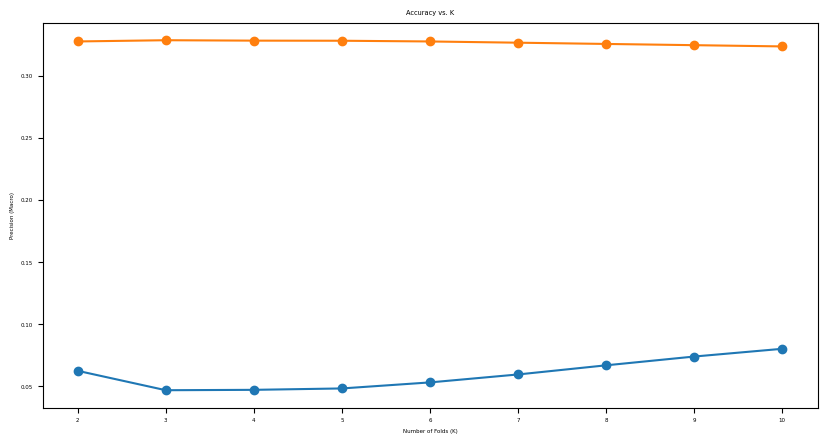

In [ ]:
K_values = range(2, 11)
plt.figure(figsize=(10, 5))
plt.plot(K_values, loss, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Log Loss')
plt.title('Loss vs. K')
plt.plot(K_values, accuracy, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Precision (Macro)')
plt.title('Accuracy vs. K')


plt.show()

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='multi:softmax', n_estimators=500, max_depth=50, learning_rate=0.01)

loss = []
accuracy = []

for i in range(2,11):
    kf = KFold(n_splits=i)
    for train_index, test_index in kf.split(X):
        Xtr, Xte = X.iloc[train_index], X.iloc[test_index]
        Ytr, Yte = Y.iloc[train_index], Y.iloc[test_index]
    model = make_pipeline(MinMaxScaler(),model).fit(Xtr,Ytr)
    loss.append(log_loss(Yte,model.predict_proba(Xte)))
    accuracy.append(precision_score(Yte,model.predict(Xte),average="macro"))

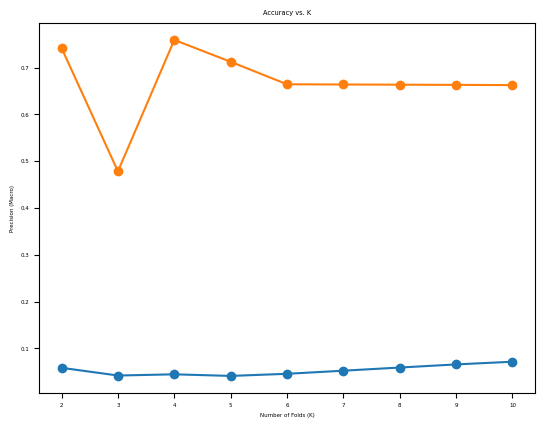

In [ ]:
K_values = range(2, 11)
plt.plot(K_values, loss, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Log Loss')
plt.title('Loss vs. K')
plt.plot(K_values, accuracy, marker='o', linestyle='-')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Precision (Macro)')
plt.title('Accuracy vs. K')


plt.show()

In [ ]:
unique_classes = np.unique(Yte)
print("Unique classes in Yte:", unique_classes)

Unique classes in Yte: [0 1 2]


In [ ]:
loss

[0.0586947864325382,
 0.042206674936473204,
 0.044810883591645014,
 0.0413738971752006,
 0.04590803459948329,
 0.052550026518456194,
 0.05929282642830342,
 0.06595268125810143,
 0.07170600593631751]

In [ ]:
accuracy

[0.7415608071345776,
 0.47824523552678894,
 0.758910749928714,
 0.7121997735264318,
 0.6641604010025063,
 0.6637375512595196,
 0.6633064516129031,
 0.662878787878788,
 0.6624579124579125]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=420)

In [ ]:
Ypre = model.predict(X_test)

Confusion Matrix

In [ ]:
multilabel_confusion_matrix(Y_test,Ypre)

array([[[  8,   0],
        [  0, 599]],

       [[603,   0],
        [  1,   3]],

       [[602,   1],
        [  0,   4]]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer().fit(Y_train)

In [ ]:
Y_onehot_test = lb.transform(Y_test)
class_of_interest = 2
class_id = np.flatnonzero(lb.classes_ == class_of_interest)[0]
class_id

2

ROC CURVE: HABITABLE VS INHABITABLE & CONSERVATIVELY HABITABLE

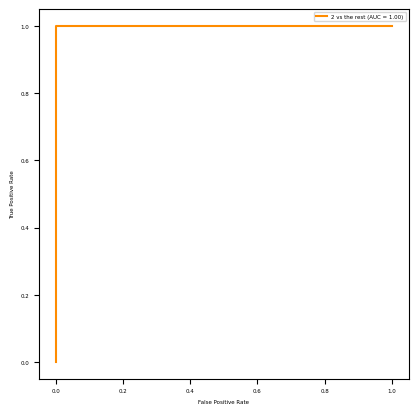

In [ ]:
RocCurveDisplay.from_predictions(
    Y_onehot_test[:, class_id],
    model.predict_proba(X_test)[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

<Axes: >

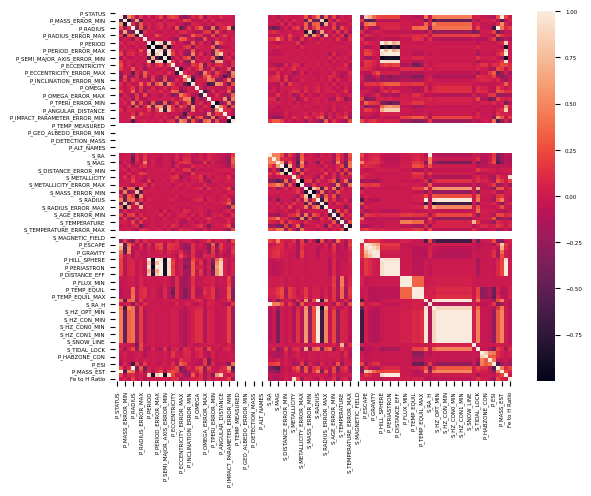

In [ ]:
sns.heatmap(zahlen.corr())

<Axes: >

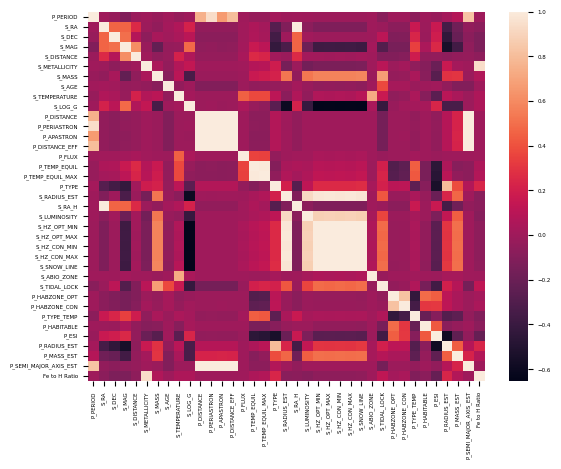

In [ ]:
sns.heatmap(data_clean.corr())

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
lgbm = LGBMClassifier(objective="multiclass",boosting_type="gbdt",num_class=3)
clf = RandomizedSearchCV(lgbm, param, random_state=69)
search = clf.fit(X,Y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
df=pd.read_csv("phl_exoplanet_catalog_2019.csv")

In [ ]:
missing = df.isna()

#missing values for each column
counts = missing.sum()

In [ ]:
#percentage
total = len(df)
percentage = (counts / total) * 100

In [ ]:
info = pd.DataFrame({'Column': df.columns, 'Missing': counts, 'Percentage': percentage})
info = info.sort_values(by='Percentage', ascending=False)
info

Column  Missing  Percentage
P_DETECTION_MASS  P_DETECTION_MASS     4048       100.0
P_GEO_ALBEDO          P_GEO_ALBEDO     4048       100.0
S_MAGNETIC_FIELD  S_MAGNETIC_FIELD     4048       100.0
S_DISC                      S_DISC     4048       100.0
P_ATMOSPHERE          P_ATMOSPHERE     4048       100.0
...                            ...      ...         ...
S_DEC                        S_DEC        0         0.0
P_STATUS                  P_STATUS        0         0.0
S_ALT_NAMES            S_ALT_NAMES        0         0.0
S_DEC_T                    S_DEC_T        0         0.0
P_NAME                      P_NAME        0         0.0

[112 rows x 3 columns]

In [ ]:
total_rows = len(df)
missing_percentages = (df.isnull().sum() / total_rows) * 100

In [ ]:
# new df with columns having less than 60% of missing values
selected_columns = missing_percentages[missing_percentages < 60.0].index
new_df = df[selected_columns]
new_df

P_NAME  P_STATUS  P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  \
0       11 Com b       3.0       NaN                 NaN                 NaN   
1       11 UMi b       3.0       NaN                 NaN                 NaN   
2       14 And b       3.0       NaN                 NaN                 NaN   
3       14 Her b       3.0       NaN                 NaN                 NaN   
4     16 Cyg B b       3.0       NaN                 NaN                 NaN   
...          ...       ...       ...                 ...                 ...   
4043    K2-296 b       3.0      1.87                0.45                 0.2   
4044    K2-296 c       3.0      2.76                 NaN                 NaN   
4045   GJ 1061 b       3.0       NaN                 NaN                 NaN   
4046   GJ 1061 c       3.0       NaN                 NaN                 NaN   
4047   GJ 1061 d       3.0       NaN                 NaN                 NaN   

      P_YEAR   P_UPDATED     P_PERIOD  P_PERIOD_ERROR_MIN  P_PERIOD_ERROR_MAX  \
0       2007  2014-05-14   326.030000             -0.3200              0.3200   
1       2009  2018-09-06   516.219970             -3.2000              3.2000   
2       2008  2014-05-14   185.840000             -0.2300              0.2300   
3       2002  2018-09-06  1773.400000             -2.5000              2.5000   
4       1996  2018-09-06   798.500000             -1.0000              1.0000   
...      ...         ...          ...                 ...                 ...   
4043    2019     5/23/19    28.165600              0.0028              0.0027   
4044    2019     5/23/19     7.906961              0.0000              0.0000   
4045    2019      9/3/19     3.204000              0.0010              0.0010   
4046    2019      9/3/19     6.689000              0.0050              0.0050   
4047    2019      9/3/19    13.031000              0.0320              0.0250   

      ...  P_HABZONE_CON  P_TYPE_TEMP P_HABITABLE     P_ESI  S_CONSTELLATION  \
0     ...              0          Hot           0  0.083813   Coma Berenices   
1     ...              0          Hot           0  0.082414       Ursa Minor   
2     ...              0          Hot           0  0.081917        Andromeda   
3     ...              0         Cold           0  0.145241         Hercules   
4     ...              1         Warm           0  0.368627           Cygnus   
...   ...            ...          ...         ...       ...              ...   
4043  ...              0         Warm           2  0.755038            Virgo   
4044  ...              0          Hot           0  0.363831            Virgo   
4045  ...              0          Hot           0  0.588562       Horologium   
4046  ...              0         Warm           1  0.879042       Horologium   
4047  ...              1         Warm           1  0.798200       Horologium   

      S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST   P_MASS_EST  \
0                     Com      Berenice's Hair     12.082709  6165.863300   
1                     UMi          Little Bear     12.229641  4684.784800   
2                     And            Andromeda     12.848516  1525.574400   
3                     Her             Hercules     12.865261  1481.078500   
4                     Cyg                 Swan     13.421749   565.733850   
...                   ...                  ...           ...          ...   
4043                  Vir               Virgin      1.870000     4.155456   
4044                  Vir               Virgin      2.760000     8.047485   
4045                  Hor       Pendulum Clock      1.102775     1.380000   
4046                  Hor       Pendulum Clock      1.178333     1.750000   
4047                  Hor       Pendulum Clock      1.164989     1.680000   

      P_SEMI_MAJOR_AXIS_EST  
0                   1.29000  
1                   1.53000  
2                   0.83000  
3                   2.93000  
4                   1.66000  
...       

In [ ]:
missing_percentages_new = (new_df.isnull().sum() / len(new_df)) * 100
missing_percentages_sorted = missing_percentages_new.sort_values(ascending=False)
missing_percentages_sorted

S_AGE_ERROR_MAX       53.384387
S_AGE_ERROR_MIN       53.384387
S_AGE                 49.827075
P_ANGULAR_DISTANCE    41.674901
P_SEMI_MAJOR_AXIS     41.526680
                        ...    
S_DEC                  0.000000
S_ALT_NAMES            0.000000
P_STATUS               0.000000
S_RA_H                 0.000000
P_NAME                 0.000000
Length: 76, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = new_df.select_dtypes(include=['object']).columns.tolist()

#label encoders for categorical columns
label_encoders = {}

In [ ]:
for col in categorical_columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le

<ipython-input-38-6e7ffd42f913>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
<ipython-input-38-6e7ffd42f913>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
<ipython-input-38-6e7ffd42f913>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)
new_df_imputed = imputer.fit_transform(new_df)

# Replacing the original new_df with the imputed data
new_df = pd.DataFrame(new_df_imputed, columns=new_df.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
corr_threshold = 0.99

In [ ]:
corr_matrix = new_df.corr().astype(float)

#a list to store the feature pairs with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

high_corr_pairs

[('P_NAME', 'S_NAME'),
 ('P_RADIUS', 'P_RADIUS_ERROR_MIN'),
 ('P_RADIUS', 'P_RADIUS_ERROR_MAX'),
 ('P_RADIUS', 'S_MAG'),
 ('P_RADIUS', 'S_DISTANCE_ERROR_MIN'),
 ('P_RADIUS', 'S_METALLICITY'),
 ('P_RADIUS', 'S_METALLICITY_ERROR_MIN'),
 ('P_RADIUS', 'S_METALLICITY_ERROR_MAX'),
 ('P_RADIUS', 'S_AGE_ERROR_MIN'),
 ('P_RADIUS', 'S_AGE_ERROR_MAX'),
 ('P_RADIUS', 'S_TEMPERATURE_ERROR_MIN'),
 ('P_RADIUS', 'S_TEMPERATURE_ERROR_MAX'),
 ('P_RADIUS', 'S_LOG_G'),
 ('P_RADIUS', 'S_LUMINOSITY'),
 ('P_RADIUS', 'S_HZ_OPT_MIN'),
 ('P_RADIUS', 'S_HZ_OPT_MAX'),
 ('P_RADIUS', 'S_HZ_CON_MIN'),
 ('P_RADIUS', 'S_HZ_CON_MAX'),
 ('P_RADIUS', 'S_HZ_CON0_MIN'),
 ('P_RADIUS', 'S_HZ_CON0_MAX'),
 ('P_RADIUS', 'S_HZ_CON1_MIN'),
 ('P_RADIUS', 'S_HZ_CON1_MAX'),
 ('P_RADIUS', 'S_SNOW_LINE'),
 ('P_RADIUS', 'S_ABIO_ZONE'),
 ('P_RADIUS', 'P_ESI'),
 ('P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX'),
 ('P_RADIUS_ERROR_MIN', 'S_MAG'),
 ('P_RADIUS_ERROR_MIN', 'S_DISTANCE_ERROR_MIN'),
 ('P_RADIUS_ERROR_MIN', 'S_METALLICITY'),
 ('P_RA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
new_df = new_df.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON',
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX',
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN',
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX',
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN',
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [ ]:
new_df.columns

Index(['P_NAME', 'P_STATUS', 'P_YEAR', 'P_UPDATED', 'P_PERIOD',
       'P_SEMI_MAJOR_AXIS', 'P_ANGULAR_DISTANCE', 'P_DETECTION', 'S_RA',
       'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX',
       'S_RADIUS', 'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX',
       'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'S_TEMPERATURE', 'S_LOG_G',
       'S_ALT_NAMES', 'P_FLUX', 'P_TYPE', 'S_TYPE_TEMP', 'S_DEC_T',
       'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP',
       'P_HABITABLE', 'S_CONSTELLATION', 'S_CONSTELLATION_ENG', 'P_RADIUS_EST',
       'P_MASS_EST'],
      dtype='object')

In [ ]:
len=new_df.columns

TypeError: ignored

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
X = new_df.drop("P_HABITABLE", axis=1)
y = new_df['P_HABITABLE']

In [ ]:
estimator = LogisticRegression(max_iter=10000)
rfe = RFE(estimator, n_features_to_select=10)

rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features:
Index(['P_DETECTION', 'S_MASS', 'S_LOG_G', 'P_TYPE', 'S_TYPE_TEMP',
       'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_RADIUS_EST',
       'P_MASS_EST'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [ ]:
features = df[['P_DETECTION', 'S_MASS', 'S_LOG_G', 'P_TYPE', 'S_TYPE_TEMP',
       'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_RADIUS_EST',
       'P_MASS_EST']]
target = df['P_HABITABLE']

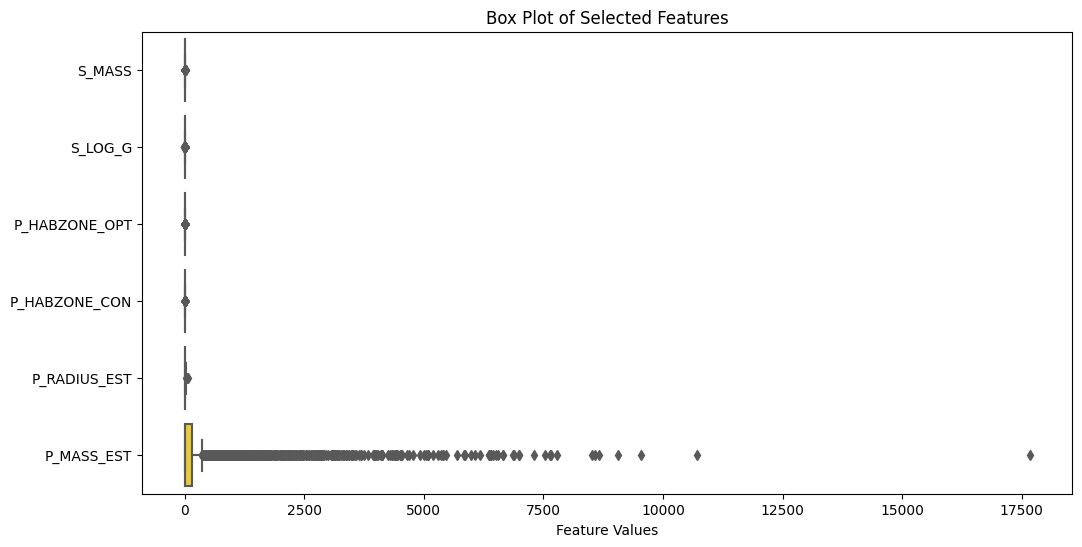

In [ ]:
selected_features = df[['P_DETECTION', 'S_MASS', 'S_LOG_G', 'P_TYPE', 'S_TYPE_TEMP',
                       'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP', 'P_RADIUS_EST',
                       'P_MASS_EST']]

# a box plot for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_features, orient="h", palette="Set2")
plt.title("Box Plot of Selected Features")
plt.xlabel("Feature Values")
plt.show()

In [ ]:
Q1 = selected_features.quantile(0.25)
Q3 = selected_features.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
filtered_features = selected_features[(selected_features >= lower_bound) & (selected_features <= upper_bound)].dropna()

print(filtered_features)

Empty DataFrame
Columns: [P_DETECTION, S_MASS, S_LOG_G, P_TYPE, S_TYPE_TEMP, P_HABZONE_OPT, P_HABZONE_CON, P_TYPE_TEMP, P_RADIUS_EST, P_MASS_EST]
Index: []


<ipython-input-82-97cb43f55f6b>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = selected_features.quantile(0.25)
<ipython-input-82-97cb43f55f6b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = selected_features.quantile(0.75)
<ipython-input-82-97cb43f55f6b>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_features = selected_features[(selected_features >= lower_bound) & (selected_features <= upper_bound)].dropna()


In [ ]:
#label encoding for categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

In [ ]:
#Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_features = imputer.fit_transform(features)

In [ ]:
# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(imputed_features)

In [ ]:
X = scaled_features
y = target

<ipython-input-59-e9eb6d0849b8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
<ipython-input-59-e9eb6d0849b8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = le.fit_transform(features[col])
<ipython-input-59-e9eb6d0849b8>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

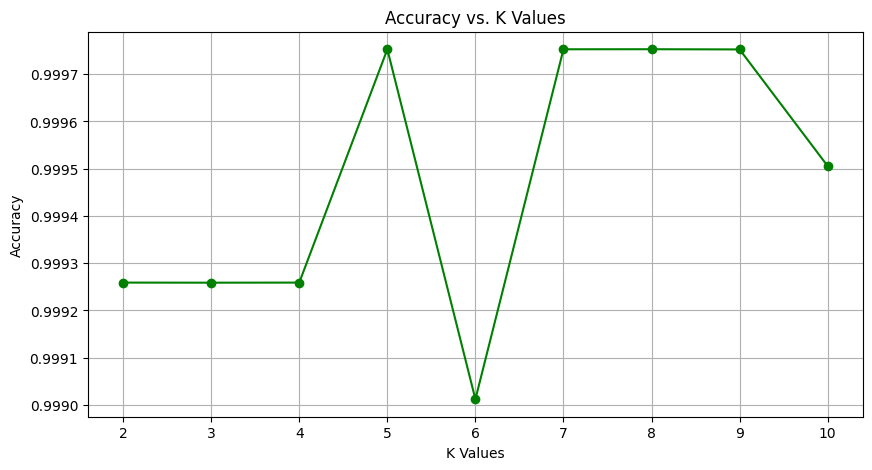

In [ ]:
k_values = range(2, 11)
losses = []
accuracies = []

# Perform K-Fold Cross Validation for values of K from 2 to 10
for K in k_values:
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    fold_losses = []
    fold_accuracies = []

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # SMOTE
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        #ENN
        enn = EditedNearestNeighbours(sampling_strategy='auto')
        X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)


        lgbm_model = LGBMClassifier(random_state=42)
        lgbm_model.fit(X_resampled, y_resampled)

        # predictions on the validation set
        y_pred = lgbm_model.predict(X_val)

        #accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)


    accuracies.append(np.mean(fold_accuracies))


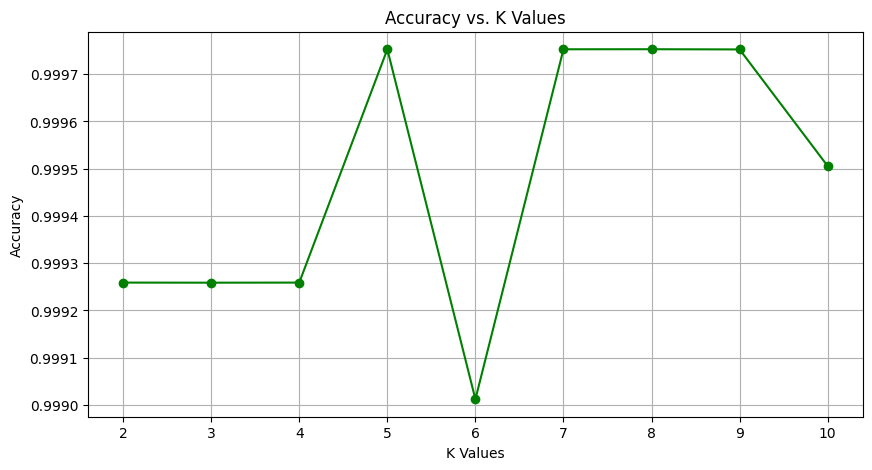

In [ ]:
#accuracy versus K values
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.title('Accuracy vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()